# **💻 CNN Fashion MNIST Prediction**

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
# image at index 0
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

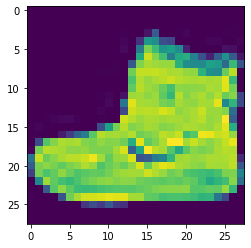

In [5]:
# view image
plt.imshow(X_train[0])

In [6]:
# category of image
y_train[0]

9

In [7]:
# max pixel
X_train.max()

255

In [8]:
# min pixel
X_train.min()

0

In [9]:
# scale train
X_train = X_train/255

In [10]:
# scale test
X_test = X_test/255

In [11]:
# shape
X_train.shape

(60000, 28, 28)

In [12]:
# add channel
X_train = X_train.reshape(60000,28,28,1)

In [13]:
# add channel
X_test = X_test.reshape(10000,28,28,1)

In [14]:
# import function
from tensorflow.keras.utils import to_categorical

In [15]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
# encode to dummy variable
y_train_dummy = to_categorical(y_train)

In [17]:
# encode to dummy variable
y_test_dummy = to_categorical(y_test)

In [18]:
# import function
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [19]:
# create model
model = Sequential()

In [20]:
# add layers

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))
# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())
# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))
# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

In [21]:
# compile
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [22]:
# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [23]:
# train
model.fit(X_train,y_train_dummy,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3973 - accuracy: 0.8584
Epoch 2/2
1875/1875 [==============================] - 40s 22ms/step - loss: 0.2760 - accuracy: 0.9009


In [24]:
# predict
y_pred = model.predict(X_test)

313/313 [==============================] - 2s 7ms/step


In [25]:
y_pred[0]

array([3.1943611e-05, 2.1492851e-07, 2.1942758e-05, 6.8395667e-07,
       1.2642675e-05, 9.2269853e-03, 6.9989714e-05, 5.4958090e-03,
       4.8154840e-04, 9.8465818e-01], dtype=float32)

In [26]:
# probability to category
y_pred = np.argmax(y_pred, axis=1)

In [27]:
# import function
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[856,   0,  21,  10,   1,   1, 105,   0,   6,   0],
       [  2, 965,   1,  19,   2,   1,   8,   0,   2,   0],
       [ 12,   0, 881,   6,  30,   0,  71,   0,   0,   0],
       [ 21,   2,  11, 901,   8,   0,  57,   0,   0,   0],
       [  0,   1, 128,  41, 710,   0, 119,   0,   1,   0],
       [  0,   0,   0,   0,   0, 977,   0,  16,   1,   6],
       [116,   0,  78,  25,  42,   0, 731,   0,   8,   0],
       [  0,   0,   0,   0,   0,   6,   0, 984,   1,   9],
       [  2,   1,   5,   0,   1,   1,   5,   3, 982,   0],
       [  0,   0,   0,   0,   0,   6,   0,  54,   1, 939]])

In [29]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1000
           1       1.00      0.96      0.98      1000
           2       0.78      0.88      0.83      1000
           3       0.90      0.90      0.90      1000
           4       0.89      0.71      0.79      1000
           5       0.98      0.98      0.98      1000
           6       0.67      0.73      0.70      1000
           7       0.93      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.94      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



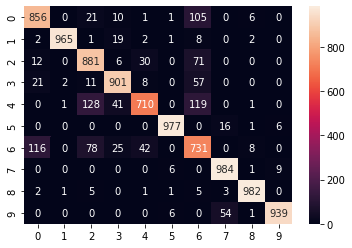

In [30]:
# heatmap of confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt = '1d');